In [3]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import plotly.express as pe
import plotly.graph_objects as pg
import numpy as np

In [4]:
df = pd.read_csv('Credit_Score_Classification.csv')
df.head()

C:\Users\hk3to\AppData\Local\Temp\ipykernel_31736\1268791475.py:1: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Credit_Score_Classification.csv')


,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [5]:
#Making sure All comns are in their correct dtype

#Getting an overview  of the data to acertain if they are the correct dtype

categorical = df.select_dtypes(include = ['category', 'object'])
numerical = df.select_dtypes(include = 'number')

print('Numerical Datasets')
display(numerical.head())
print(f'\n\nCategorical Dataset')
display(categorical.head())

Numerical Datasets


,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Num_Credit_Inquiries,Credit_Utilization_Ratio,Total_EMI_per_month
0,1824.843333,3,4,3,3,4.0,26.822620,49.574949
1,NaN,3,4,3,-1,4.0,31.944960,49.574949
2,NaN,3,4,3,3,4.0,28.609352,49.574949
3,NaN,3,4,3,5,4.0,31.377862,49.574949
4,1824.843333,3,4,3,6,4.0,24.797347,49.574949




Categorical Dataset


,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Num_of_Loan,Type_of_Loan,Num_of_Delayed_Payment,Changed_Credit_Limit,Credit_Mix,Outstanding_Debt,Credit_History_Age,Payment_of_Min_Amount,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",7,11.27,_,809.98,22 Years and 1 Months,No,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",NaN,11.27,Good,809.98,NaN,No,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",7,_,Good,809.98,22 Years and 3 Months,No,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",4,6.27,Good,809.98,22 Years and 4 Months,No,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",NaN,11.27,Good,809.98,22 Years and 5 Months,No,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [6]:
#After getting the overview of where each column falls between numerical and categorical, some oberved problematic columns will have their dtype changed to match the data contained within

wrong_dtype = ['Age', 'Annual_Income', 'Num_of_Loan', 'Num_of_Delayed_Payment','Outstanding_Debt', 'Amount_invested_monthly','Monthly_Balance']

for i in wrong_dtype:
    df[i] = pd.to_numeric(df[i], errors='coerce')
    print(f'The new dtype for the column {i} is {df[i].dtype}')
    

The new dtype for the column Age is float64
The new dtype for the column Annual_Income is float64
The new dtype for the column Num_of_Loan is float64
The new dtype for the column Num_of_Delayed_Payment is float64
The new dtype for the column Outstanding_Debt is float64
The new dtype for the column Amount_invested_monthly is float64
The new dtype for the column Monthly_Balance is float64


In [7]:
#Getting an overview regarding the amount of missing data per column

missing_data = pd.DataFrame({'feature': df.columns, 'missing': [i for i in df.isnull().sum()], 'Perc missing': [i for i in ((df.isnull().sum()/ len(df) )* 100).round(2)], 'Datatype':df.dtypes.values})
missing_data



,feature,missing,Perc missing,Datatype
0,ID,0,0.00,object
1,Customer_ID,0,0.00,object
2,Month,0,0.00,object
3,Name,9985,9.98,object
4,Age,4939,4.94,float64
5,SSN,0,0.00,object
6,Occupation,0,0.00,object
7,Annual_Income,6980,6.98,float64
8,Monthly_Inhand_Salary,15002,15.00,float64
9,Num_Bank_Accounts,0,0.00,int64


In [8]:
#Adressing Missing data

# filling in missing values with appropriate placeholders


dropped_columns = []
for i in df.columns:
    if ((df[i].isnull().sum()/ len(df) ) * 100).round() < 30:
        if i == 'Name':
            df[i].fillna("No Name", inplace=True)
        else:
            if df[i].dtypes == 'O':
                df[i].fillna(df[i].mode()[0], inplace = True)
            else:
                df[i].fillna(df[i].median(), inplace = True)
    else:
        dropped_columns.append(i)
        df[i].drop(i, axis = 1, inplace = True)
        
dropped_columns       
df.isnull().sum().sort_values(ascending = False).head(2)

ID             0
Customer_ID    0
dtype: int64

In [9]:
# Verifying that there is no longer any null values

missing_data = pd.DataFrame({'feature': df.columns, 'missing': [i for i in df.isnull().sum()], 'Perc missing': [i for i in ((df.isnull().sum()/ len(df) )* 100).round(2)], 'Datatype':df.dtypes.values})
missing_data

,feature,missing,Perc missing,Datatype
0,ID,0,0.0,object
1,Customer_ID,0,0.0,object
2,Month,0,0.0,object
3,Name,0,0.0,object
4,Age,0,0.0,float64
5,SSN,0,0.0,object
6,Occupation,0,0.0,object
7,Annual_Income,0,0.0,float64
8,Monthly_Inhand_Salary,0,0.0,float64
9,Num_Bank_Accounts,0,0.0,int64


In [10]:
# Getting a glimpse of the dataframe with affixed null values
sample = df.sample(10)
sample

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
24527,0xa5b5,CUS_0x4367,August,Christiaanw,33.0,208-70-4954,Accountant,23312.22,1814.685000,6,...,Standard,1067.99,26.175127,31 Years and 6 Months,No,25.174330,53.905447,!@9#%8,352.388723,Standard
8628,0x488e,CUS_0x64a3,May,Harichb,28.0,420-36-8896,Teacher,55916.52,4597.710000,8,...,Standard,1069.61,27.939323,26 Years and 7 Months,Yes,103.066389,97.238916,High_spent_Medium_value_payments,509.465695,Standard
21486,0x93e4,CUS_0xbd64,July,Paritosh Bansalr,27.0,488-49-1260,Manager,28749.39,2181.782500,7,...,_,1084.73,30.395764,17 Years and 1 Months,No,93.136824,181.045205,Low_spent_Small_value_payments,233.996221,Standard
59253,0x1712f,CUS_0x55b,June,Richardy,52.0,#F%$D@*&8,Developer,35532.88,2874.073333,8,...,Good,448.66,27.195724,23 Years and 3 Months,No,31.821299,180.641268,Low_spent_Small_value_payments,364.944766,Standard
98763,0x258b1,CUS_0x38c2,April,Andreasc,18.0,423-55-1106,Musician,34860.36,2739.030000,8,...,Standard,1301.87,39.178075,32 Years and 11 Months,Yes,34.611585,103.243786,!@9#%8,406.047630,Poor
43970,0x117a4,CUS_0x77e2,March,Li,28.0,143-90-2973,Media_Manager,9694340.00,5368.593333,6,...,Bad,1522.95,32.872182,19 Years and 6 Months,Yes,250.847665,468.029562,Low_spent_Small_value_payments,107.982107,Standard
95800,0x24756,CUS_0xc14e,January,Ellen Freilichd,31.0,073-88-2612,Engineer,42578.46,3811.205000,10,...,_,3538.34,27.743173,15 Years and 11 Months,Yes,109.676355,172.317054,Low_spent_Small_value_payments,389.127091,Poor
52384,0x148f2,CUS_0xc700,January,Edwardh,38.0,078-41-7717,Lawyer,32072.42,2768.701667,4,...,Good,441.00,31.881989,15 Years and 11 Months,No,76.468792,39.514779,High_spent_Medium_value_payments,410.886596,Poor
4231,0x2ec9,CUS_0x6732,August,No Name,50.0,060-69-0738,Journalist,140390.32,11888.193333,5,...,Good,1423.23,38.621181,31 Years and 3 Months,No,182.160424,882.944952,Low_spent_Large_value_payments,393.713958,Good
77544,0x1dc5e,CUS_0x85d,January,Forgionev,44.0,722-14-8267,Architect,41771.02,3293.918333,6,...,Bad,3524.73,24.735922,8 Years and 2 Months,Yes,127.617609,109.442464,High_spent_Medium_value_payments,342.331760,Standard


In [11]:
#Observed problematic data 

count_occupation = df[df['Occupation'] == '_______'].count() #<-----6575
count_paymntb = df[df['Payment_Behaviour'] == '!@9#%8'].count() #<---- 10425
count_crdmx = df[df['Credit_Mix'] == '_'].count() # <------------------36479
count_ssn = df[df['SSN'] == '#F%$D@*&8'].count()  #<------------------



print(f'Occupation entry count is {count_occupation.Occupation} and its percent in its column is {(count_occupation.Occupation/len(df.Occupation)) * 100} percent')
print(f'Payment behavoiur entry count is {count_paymntb.Payment_Behaviour} and its percent in its column is {(count_paymntb.Payment_Behaviour/len(df.Payment_Behaviour)) * 100} percent')
print(f'Credit mix entry count is {count_crdmx.Credit_Mix} {(count_crdmx.Credit_Mix/len(df.Credit_Mix)) * 100} percent')
print(f'SSN entry count is {count_ssn.SSN} {(count_ssn.SSN/len(df.SSN)) * 100} percent')

Occupation entry count is 7062 and its percent in its column is 7.062 percent
Payment behavoiur entry count is 7600 and its percent in its column is 7.6 percent
Credit mix entry count is 20195 20.195 percent
SSN entry count is 5572 5.572 percent


In [12]:
# Homogenizing MNAR data for easy reading

problem_col = ['Occupation', 'Payment_Behaviour', 'Credit_Mix', 'SSN']
bad_data = ['_______', '!@9#%8', '_', '#F%$D@*&8']
for i,j in zip(problem_col, bad_data):
    df[i] = df[i].replace(j, 'No data')
    

In [13]:
smaple = df.sample(10)
smaple

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
85038,0x20844,CUS_0xc4e,July,Gianluca Semeraror,39.0,109-27-0987,Writer,17213.610,1350.467500,9,...,Bad,2818.55,29.848952,1 Years and 4 Months,NM,70.428792,39.755165,Low_spent_Medium_value_payments,304.862793,Standard
51406,0x14334,CUS_0xc4b2,July,Poornimah,35.0,713-13-2504,Journalist,16285.005,1464.862870,7,...,No data,1329.59,37.789892,17 Years and 5 Months,Yes,84.220880,70.853952,Low_spent_Small_value_payments,374.054423,Good
82265,0x1f807,CUS_0x7b9d,February,Aaron Pressmanb,24.0,411-37-9487,No data,16229.860,1216.488333,7,...,Bad,3138.55,38.036037,10 Years and 8 Months,Yes,64.068409,31.766670,High_spent_Medium_value_payments,275.813753,Poor
47900,0x12eaa,CUS_0x3023,May,Stephenl,28.0,775-12-4739,Musician,32613.680,2696.806667,9,...,Bad,3868.66,25.957539,2 Years and 9 Months,Yes,116.688538,262.679356,No data,180.312773,Standard
22118,0x9798,CUS_0x7c6d,July,Francescay,24.0,889-77-4172,Accountant,39139.350,3414.612500,4,...,Good,1258.77,32.567896,16 Years and 7 Months,No,57561.000000,128.954538,Low_spent_Medium_value_payments,258.439191,Poor
54996,0x1583e,CUS_0x3139,May,No Name,18.0,490-80-5398,Accountant,19369.960,1791.163333,6,...,Standard,1266.31,28.018999,16 Years and 0 Months,Yes,57.412212,157.445661,Low_spent_Large_value_payments,234.258460,Good
69983,0x1b00d,CUS_0x767f,August,No Name,31.0,306-61-2861,Architect,29986.480,3093.745000,10,...,Bad,3836.36,30.862408,1 Years and 5 Months,Yes,120.765757,105.139703,High_spent_Medium_value_payments,289.681874,Poor
73574,0x1c518,CUS_0x88e3,July,Katya Wachtelf,20.0,No data,No data,60829.800,3093.745000,4,...,Good,445.39,33.665793,32 Years and 7 Months,No,106.318502,283.783245,Low_spent_Medium_value_payments,410.613253,Standard
98031,0x25465,CUS_0x69be,August,da Costab,44.0,490-71-8764,Lawyer,80807.370,6796.947500,3,...,No data,970.11,27.927520,32 Years and 9 Months,No,161.034389,329.243941,Low_spent_Medium_value_payments,469.416420,Good
8952,0x4a76,CUS_0x8c1,January,Wohlu,25.0,239-64-7596,Accountant,98917.230,8513.102500,1,...,Good,738.81,30.846406,15 Years and 1 Months,No,115.531325,261.340428,High_spent_Medium_value_payments,724.438497,Good


In [14]:
#Verifying reolution of problematic data problematic data 

count_occupation = df[df['Occupation'] == '_______'].count() #<-----6575
count_paymntb = df[df['Payment_Behaviour'] == '!@9#%8'].count() #<---- 10425
count_crdmx = df[df['Credit_Mix'] == '_'].count() # <------------------36479
count_ssn = df[df['SSN'] == '#F%$D@*&8'].count()  #<------------------



print(f'Occupation entry count is {count_occupation.Occupation} and its percent in its column is {(count_occupation.Occupation/len(df.Occupation)) * 100} percent')
print(f'Payment behavoiur entry count is {count_paymntb.Payment_Behaviour} and its percent in its column is {(count_paymntb.Payment_Behaviour/len(df.Payment_Behaviour)) * 100} percent')
print(f'Credit mix entry count is {count_crdmx.Credit_Mix} {(count_crdmx.Credit_Mix/len(df.Credit_Mix)) * 100} percent')
print(f'SSN entry count is {count_ssn.SSN} {(count_ssn.SSN/len(df.SSN)) * 100} percent')

Occupation entry count is 0 and its percent in its column is 0.0 percent
Payment behavoiur entry count is 0 and its percent in its column is 0.0 percent
Credit mix entry count is 0 0.0 percent
SSN entry count is 0 0.0 percent


In [15]:
#Summary statistics of numerical data to get insight into data and existing outliers

sumry_stat = df.describe()
sumry_stat 

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
count,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,107.085320,1.687352e+05,4029.084964,17.091280,22.47443,72.466040,2.790850,21.068780,29.373010,27.326780,1423.878951,32.285173,1403.118217,189.690637,401.755494
std,672.379285,1.392075e+06,2961.363540,117.404834,129.05741,466.422621,60.987279,14.860104,215.671804,191.293766,1149.497752,5.116875,8306.041270,191.527772,212.750017
min,-500.000000,7.005930e+03,303.645417,-1.000000,0.00000,1.000000,-100.000000,-5.000000,-3.000000,0.000000,0.230000,20.000000,0.000000,0.000000,0.007760
25%,25.000000,2.006286e+04,1792.084167,3.000000,4.00000,8.000000,2.000000,10.000000,9.000000,3.000000,571.650000,28.052567,30.306660,77.017414,270.913865
50%,33.000000,3.755074e+04,3093.745000,6.000000,5.00000,13.000000,3.000000,18.000000,14.000000,6.000000,1166.370000,32.305784,69.249473,128.954538,336.731225
75%,42.000000,7.006492e+04,5371.525000,7.000000,7.00000,20.000000,5.000000,28.000000,18.000000,9.000000,1933.430000,36.496663,161.224249,220.039055,467.670597
max,8698.000000,2.419806e+07,15204.633333,1798.000000,1499.00000,5797.000000,1496.000000,67.000000,4397.000000,2597.000000,4998.070000,50.000000,82331.000000,1977.326102,1602.040519


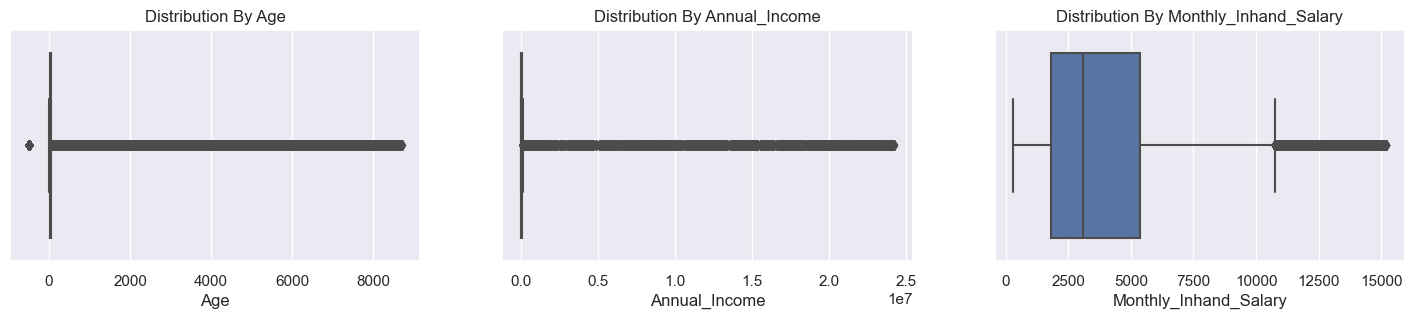

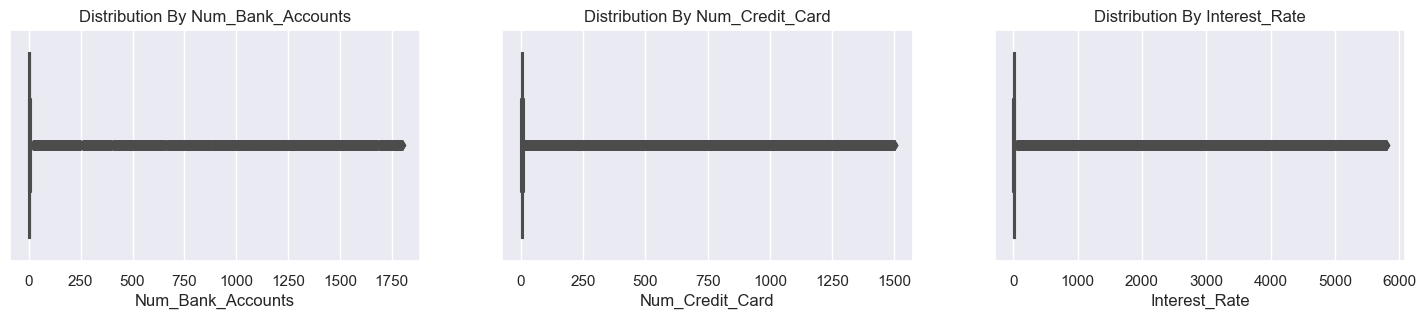

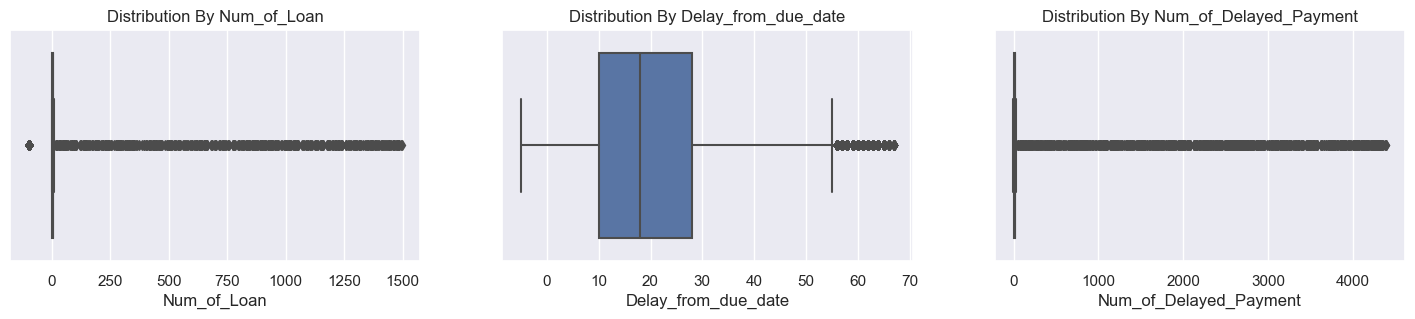

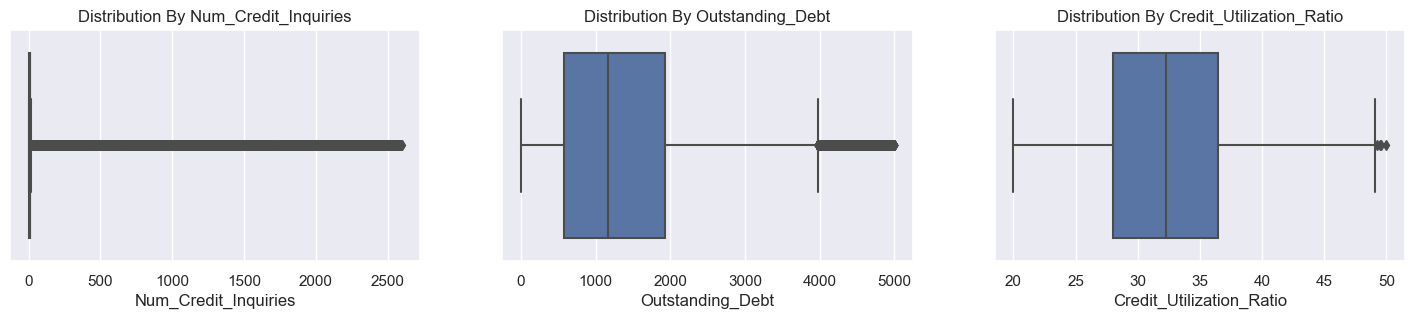

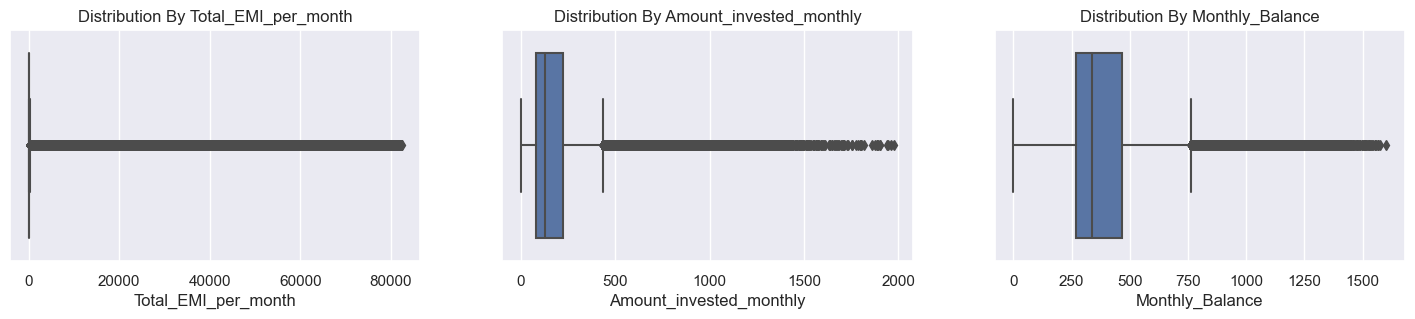

In [16]:
# Visualization of outliers using boxplots

#Filter for numerical data types only
val = []
for x in df.columns:
    if df[x].dtype != 'object':
        val.append(x)



def plotter(dfframe, a,b,c):
    sns.set(style = 'darkgrid')
    plt.figure(figsize = (18, 3))
    plt.subplot(1, 3, 1)
    sns.boxplot(x = df[a])
    plt.title(f'Distribution By {a}')

    plt.subplot(1, 3, 2)
    sns.boxplot(x = df[b])
    plt.title(f'Distribution By {b}')

    plt.subplot(1, 3, 3)
    sns.boxplot(x = df[c])
    plt.title(f'Distribution By {c}')

    plt.show()

for v in range(0, len(val), 3):  # Increment by 3 to process three columns at a time
    if v + 2 < len(val):  # Ensure there are at least three columns left to process
        plotter(df, val[v], val[v + 1], val[v + 2])

In [17]:
# Outlier resolution


# This selects all numeric data types
numeric_columns = df.select_dtypes(exclude=['object'])  

# Create a new DataFrame containing only numeric columns
new_df = df[numeric_columns.columns]



def outlierRemover(dataframe):
    feature_list, lowerThresh_list, upperThresh_list = [], [], []

    for j,i in enumerate(dataframe.columns):
        Q1 = dataframe[i].describe()[4]
        Q3 = dataframe[i].describe()[6]
        IQR = Q3 - Q1
        lowerThreshold = Q1 - 1.5 * IQR
        upperThreshold = Q3 + 1.5 *  IQR

        feature_list.append(dataframe.columns[j])
        lowerThresh_list.append(lowerThreshold)
        upperThresh_list.append(upperThreshold)

        recorder = pd.DataFrame({'feature': feature_list, 'lowerThreshold': lowerThresh_list, 'upperThreshold': upperThresh_list})

        dataframe = dataframe.loc[(dataframe[i] >= lowerThreshold) & (dataframe[i] <= upperThreshold)]

    return dataframe

data = outlierRemover(new_df)
# new = pd.DataFrame({'Occupation': [i for i in df[name].unique()], 'Count': [c for c in df[name].value_counts()]})

dat = pd.DataFrame(data)

In [18]:
# Summary overview of resolved numerical data after removal of outliers

new_sumry_stat = dat.describe()
new_sumry_stat 

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
count,57878.000000,57878.000000,57878.000000,57878.000000,57878.000000,57878.000000,57878.000000,57878.000000,57878.000000,57878.000000,57878.000000,57878.000000,57878.000000,57878.000000,57878.000000
mean,33.257732,35741.718811,2983.085153,5.413888,5.516915,14.581948,3.460676,20.174401,13.472684,5.809168,1299.203273,31.991273,74.997923,129.259619,358.703339
std,10.517432,22030.605001,1756.459886,2.513383,2.022460,8.573967,2.238566,13.273841,5.746489,3.769742,918.454736,4.985826,69.193968,82.028053,123.156757
min,14.000000,7005.930000,303.645417,-1.000000,0.000000,1.000000,0.000000,-5.000000,-2.000000,0.000000,0.230000,21.264254,0.000000,0.000000,12.561078
25%,25.000000,18170.075000,1594.853333,4.000000,4.000000,8.000000,2.000000,10.000000,10.000000,3.000000,573.895000,27.796521,25.174330,67.198966,273.923184
50%,33.000000,32303.730000,2897.685833,6.000000,5.000000,13.000000,3.000000,18.000000,14.000000,6.000000,1166.370000,31.988280,53.515554,118.229756,329.224324
75%,41.000000,43995.950000,3504.301667,7.000000,7.000000,20.000000,5.000000,27.000000,18.000000,8.000000,1808.120000,36.205593,103.318627,165.015723,421.854898
max,56.000000,143252.760000,10275.265000,11.000000,11.000000,34.000000,9.000000,57.000000,28.000000,17.000000,3962.260000,43.571488,315.663937,389.889714,721.754299


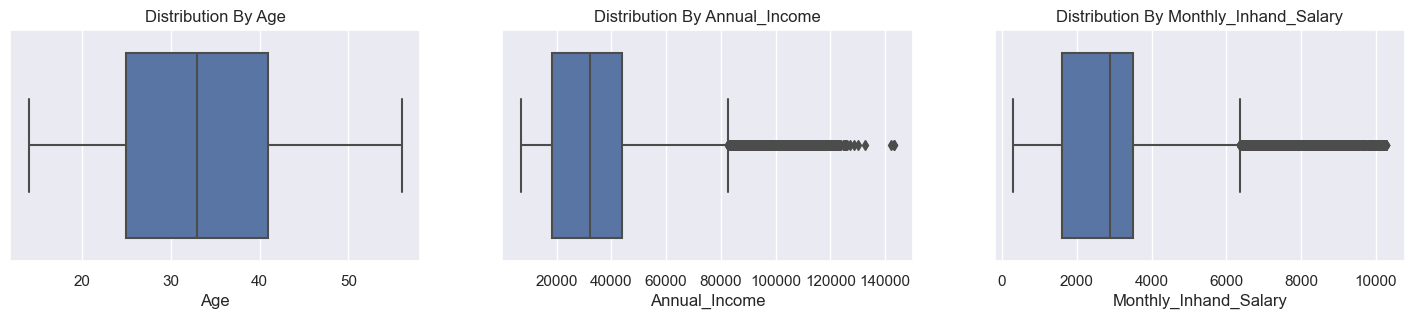

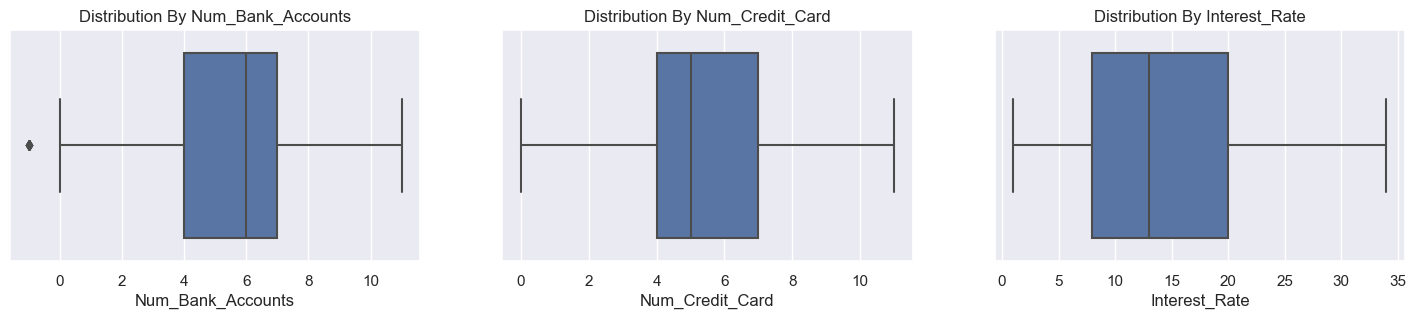

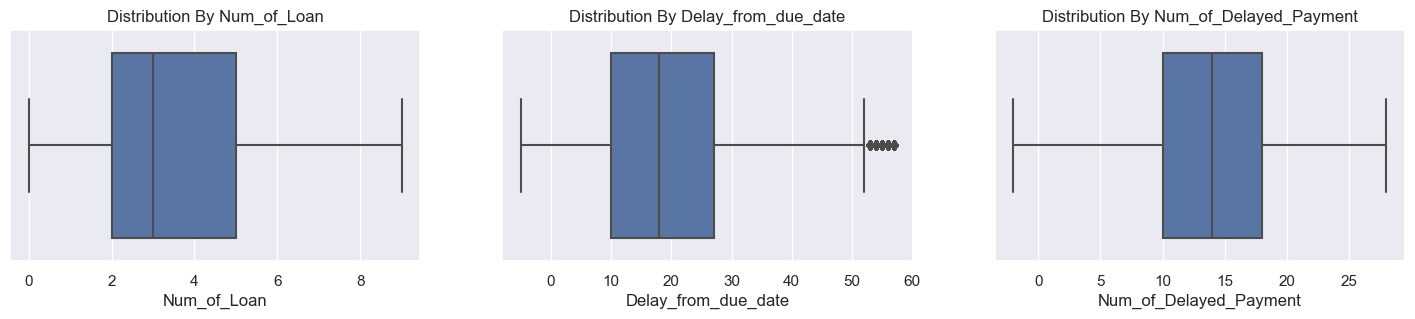

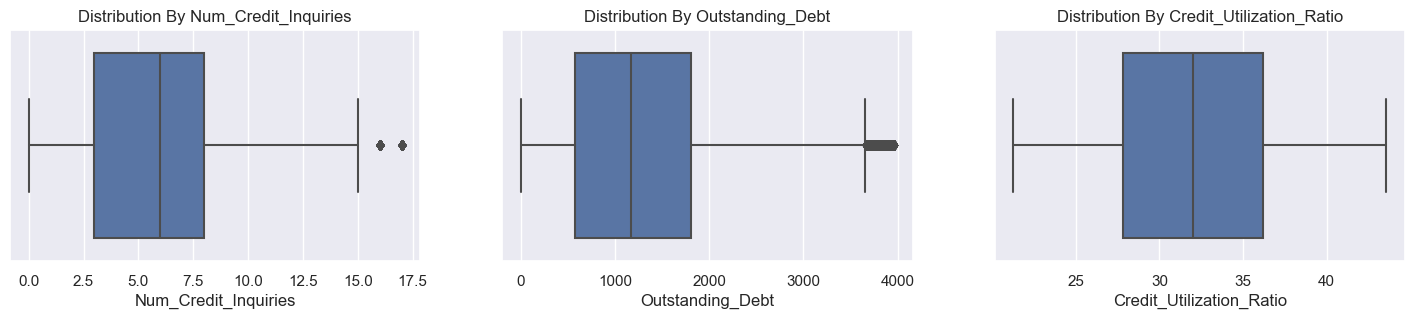

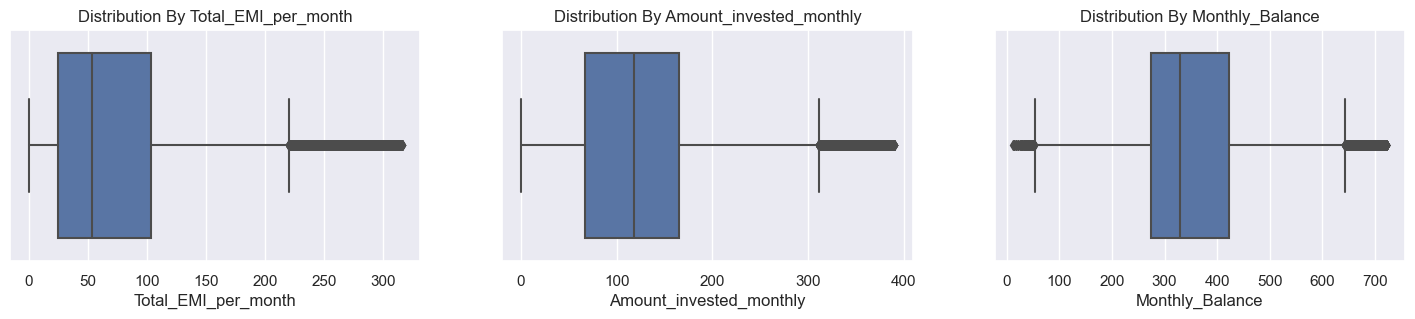

In [19]:
#Visualization of outlier resolution


val = []
for x in dat.columns:
    if dat[x].dtype != 'object':
        val.append(x)



def plotter(dfframe, a,b,c):
    sns.set(style = 'darkgrid')
    plt.figure(figsize = (18, 3))
    plt.subplot(1, 3, 1)
    sns.boxplot(x = dat[a])
    plt.title(f'Distribution By {a}')

    plt.subplot(1, 3, 2)
    sns.boxplot(x = dat[b])
    plt.title(f'Distribution By {b}')

    plt.subplot(1, 3, 3)
    sns.boxplot(x = dat[c])
    plt.title(f'Distribution By {c}')

    plt.show()

for v in range(0, len(val), 3):  # Increment by 3 to process three columns at a time
    if v + 2 < len(val):  # Ensure there are at least three columns left to process
        plotter(dat, val[v], val[v + 1], val[v + 2])

In [23]:
#Merging cleaned datasets

# cleaned_data = df.merge(dat, on = 'Age', how = 'inner')
cleaned_data = pd.concat([dat, df], axis =1)
cleaned_data.dropna(inplace=True)
cleaned_data

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Num_Credit_Inquiries,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,7.0,4.0,...,No data,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.415295,High_spent_Small_value_payments,312.494089,Good
1,23.0,19114.12,3093.745000,3.0,4.0,3.0,4.0,-1.0,14.0,4.0,...,Good,809.98,31.944960,15 Years and 11 Months,No,49.574949,118.280222,Low_spent_Large_value_payments,284.629162,Good
3,23.0,19114.12,3093.745000,3.0,4.0,3.0,4.0,5.0,4.0,4.0,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.458074,Low_spent_Small_value_payments,223.451310,Good
4,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,6.0,14.0,4.0,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153,High_spent_Medium_value_payments,341.489231,Good
5,23.0,19114.12,3093.745000,3.0,4.0,3.0,4.0,8.0,4.0,4.0,...,Good,809.98,27.262259,22 Years and 6 Months,No,49.574949,62.430172,No data,340.479212,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99994,25.0,39628.99,3359.415833,4.0,6.0,7.0,2.0,20.0,6.0,3.0,...,No data,502.38,39.323569,31 Years and 5 Months,No,35.104023,140.581403,High_spent_Medium_value_payments,410.256158,Poor
99995,25.0,39628.99,3359.415833,4.0,6.0,7.0,2.0,23.0,7.0,3.0,...,No data,502.38,34.663572,31 Years and 6 Months,No,35.104023,60.971333,High_spent_Large_value_payments,479.866228,Poor
99996,25.0,39628.99,3359.415833,4.0,6.0,7.0,2.0,18.0,7.0,3.0,...,No data,502.38,40.565631,31 Years and 7 Months,No,35.104023,54.185950,High_spent_Medium_value_payments,496.651610,Poor
99998,25.0,39628.99,3359.415833,4.0,6.0,7.0,2.0,20.0,14.0,3.0,...,Good,502.38,33.638208,31 Years and 9 Months,No,35.104023,251.672582,Low_spent_Large_value_payments,319.164979,Standard


In [24]:
# Exporting newly cleaned data
cleaned_data.to_csv('Cleaned_Credit_Score_Classification.csv')